# Activity 6.1 : Neural Networks

Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
Code Title: | Emerging Technologies in CpE 2
2nd Semester | AY 2023-2024
<hr> | <hr>
<u>**ACTIVITY**</u> | <u>**Activity 1.1**</u>
**Name** | Cuevas, Christian Jay L.
**Section** | CPE32S3
**Date Performed**: | 4/2/2024
**Date Submitted**: | 4/2/2024
**Instructor**: | Engr. Roman M. Richard  

<hr>

#### Objective(s):

This activity aims to demonstrate the concepts of neural networks

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to use activation function in neural networks
* Demonstrate how to apply feedforward and backpropagation in neural networks


#### Resources:
* Jupyter Notebook


#### Procedure:

Import the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Define and plot an activation function

### Sigmoid function:

$$
\sigma = \frac{1}{1 + e^{-x}}
$$

$\sigma$ ranges from (0, 1). When the input $x$ is negative, $\sigma$ is close to 0. When $x$ is positive, $\sigma$ is close to 1. At $x=0$, $\sigma=0.5$

In [ ]:
## create a sigmoid function
def sigmoid(x):
    """Sigmoid function"""
    return 1.0 / (1.0 + np.exp(-x))

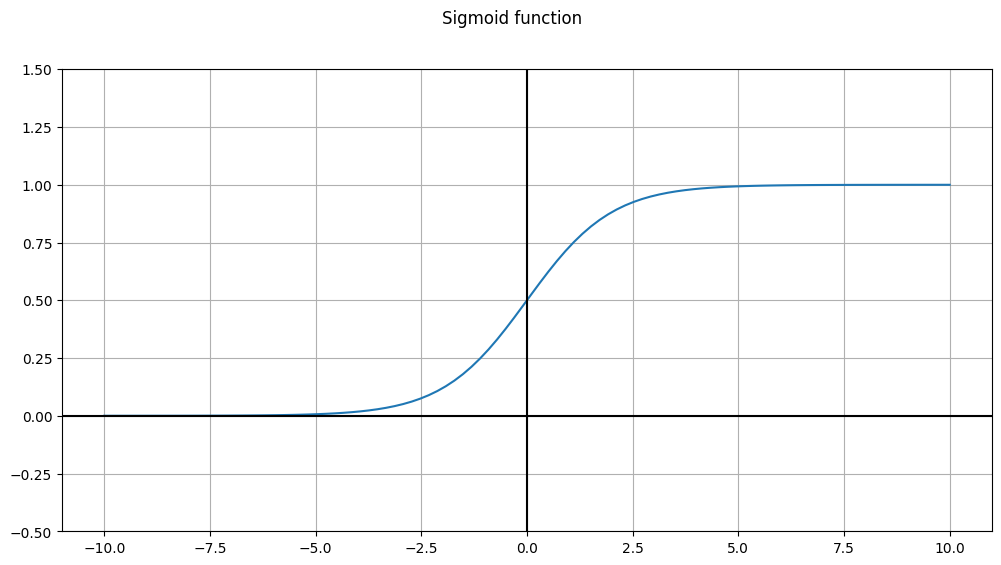

In [ ]:
# Plot the sigmoid function
vals = np.linspace(-10, 10, num=100, dtype=np.float32)
activation = sigmoid(vals)
fig = plt.figure(figsize=(12,6))
fig.suptitle('Sigmoid function')
plt.plot(vals, activation)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.yticks()
plt.ylim([-0.5, 1.5]);

Choose any activation function and create a method to define that function.

In [ ]:
def hyptanh(x):
  cosh = (np.exp(x)+np.exp(-x))/2
  sinh = (np.exp(x)-np.exp(-x))/2
  return sinh/cosh

Plot the activation function

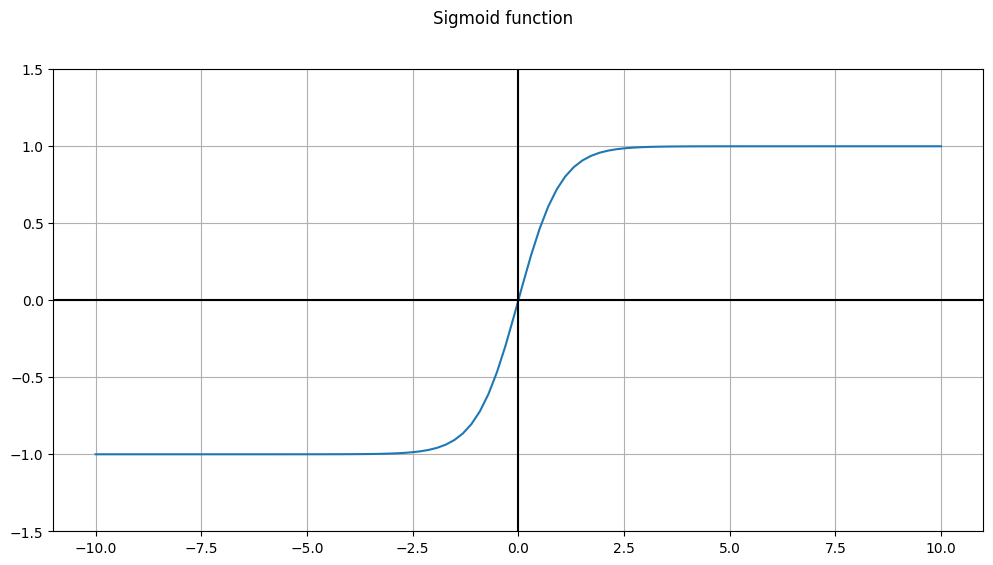

In [ ]:
vals = np.linspace(-10, 10, num=100, dtype=np.float32)
activation = hyptanh(vals)
fig = plt.figure(figsize=(12,6))
fig.suptitle('Sigmoid function')
plt.plot(vals, activation)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.yticks()
plt.ylim([-1.5, 1.5]);

<hr>

**Observation**:
- The difference between the sigmoid function and the hyptanh function is that the sigmoid function's range is from 0 to 1 while  the hyptanh function's range is from -1 to 1.

<hr>

### Neurons as boolean logic gates



### OR Gate

<table>

<tr>
<th colspan="3">OR gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>1</td>
</tr>

</table>

A neuron that uses the sigmoid activation function outputs a value between (0, 1). This naturally leads us to think about boolean values.



By limiting the inputs of $x_1$ and $x_2$ to be in $\left\{0, 1\right\}$, we can simulate the effect of logic gates with our neuron. The goal is to find the weights , such that it returns an output close to 0 or 1 depending on the inputs.

What numbers for the weights would we need to fill in for this gate to output OR logic? Observe from the plot above that $\sigma(z)$ is close to 0 when $z$ is largely negative (around -10 or less), and is close to 1 when $z$ is largely positive (around +10 or greater).

$$
z = w_1 x_1 + w_2 x_2 + b
$$

Let's think this through:

* When $x_1$ and $x_2$ are both 0, the only value affecting $z$ is $b$. Because we want the result for (0, 0) to be close to zero, $b$ should be negative (at least -10)
* If either $x_1$ or $x_2$ is 1, we want the output to be close to 1. That means the weights associated with $x_1$ and $x_2$ should be enough to offset $b$ to the point of causing $z$ to be at least 10.
* Let's give $b$ a value of -10. How big do we need $w_1$ and $w_2$ to be?
    * At least +20
* So let's try out $w_1=20$, $w_2=20$, and $b=-10$!

In [ ]:
def logic_gate(w1, w2, b):
    # Helper to create logic gate functions
    # Plug in values for weight_a, weight_b, and bias
    return lambda x1, x2: sigmoid(w1 * x1 + w2 * x2 + b)

def test(gate):
    # Helper function to test out our weight functions.
    for a, b in (0, 0), (0, 1), (1, 0), (1, 1):
        print("{}, {}: {}".format(a, b, np.round(gate(a, b))))

In [ ]:
or_gate = logic_gate(20, 20, -10)
test(or_gate)

0, 0: 0.0
0, 1: 1.0
1, 0: 1.0
1, 1: 1.0


<table>

<tr>
<th colspan="3">OR gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>1</td>
</tr>

</table>

Try finding the appropriate weight values for each truth table.

### AND Gate

<table>

<tr>
<th colspan="3">AND gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>0</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>1</td>
</tr>

</table>


Try to figure out what values for the neurons would make this function as an AND gate.

In [ ]:
# Fill in the w1, w2, and b parameters such that the truth table matches
w1 = 10
w2 = 10
b = -15
and_gate = logic_gate(w1, w2, b)

test(and_gate)

0, 0: 0.0
0, 1: 0.0
1, 0: 0.0
1, 1: 1.0


Do the same for the NOR gate and the NAND gate.

In [ ]:
#NOR
w1 = -20
w2 = -20
b = 10

nor_gate = logic_gate(w1, w2, b)

test(nor_gate)

0, 0: 1.0
0, 1: 0.0
1, 0: 0.0
1, 1: 0.0


In [ ]:
#NAND
w1 = -10
w2 = -10
b = 20

nand_gate = logic_gate(w1, w2, b)

test(nand_gate)

0, 0: 1.0
0, 1: 1.0
1, 0: 1.0
1, 1: 0.0


## Limitation of single neuron

 Here's the truth table for XOR:

### XOR (Exclusive Or) Gate

<table>

<tr>
<th colspan="3">XOR gate truth table</th>
</tr>

<tr>
<th colspan="2">Input</th>
<th>Output</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>0</td>
</tr>

</table>

Now the question is, can you create a set of weights such that a single neuron can output this property?

It turns out that you cannot. Single neurons can't correlate inputs, so it's just confused. So individual neurons are out. Can we still use neurons to somehow form an XOR gate?


In [ ]:
# Make sure you have or_gate, nand_gate, and and_gate working from above!
def xor_gate(a, b):
    c = or_gate(a, b)
    d = nand_gate(a, b)
    return and_gate(c, d)
test(xor_gate)

0, 0: 0.0
0, 1: 1.0
1, 0: 1.0
1, 1: 0.0


## Feedforward Networks

The feed-forward computation of a neural network can be thought of as matrix calculations and activation functions.  We will do some actual computations with matrices to see this in action.

## Exercise
Provided below are the following:

- Three weight matrices `W_1`, `W_2` and `W_3` representing the weights in each layer.  The convention for these matrices is that each $W_{i,j}$ gives the weight from neuron $i$ in the previous (left) layer to neuron $j$ in the next (right) layer.  
- A vector `x_in` representing a single input and a matrix `x_mat_in` representing 7 different inputs.
- Two functions: `soft_max_vec` and `soft_max_mat` which apply the soft_max function to a single vector, and row-wise to a matrix.

The goals for this exercise are:
1. For input `x_in` calculate the inputs and outputs to each layer (assuming sigmoid activations for the middle two layers and soft_max output for the final layer.
2. Write a function that does the entire neural network calculation for a single input
3. Write a function that does the entire neural network calculation for a matrix of inputs, where each row is a single input.
4. Test your functions on `x_in` and `x_mat_in`.

This illustrates what happens in a NN during one single forward pass. Roughly speaking, after this forward pass, it remains to compare the output of the network to the known truth values, compute the gradient of the loss function and adjust the weight matrices `W_1`, `W_2` and `W_3` accordingly, and iterate. Hopefully this process will result in better weight matrices and our loss will be smaller afterwards

In [ ]:
W_1 = np.array([[2,-1,1,4],[-1,2,-3,1],[3,-2,-1,5]])
W_2 = np.array([[3,1,-2,1],[-2,4,1,-4],[-1,-3,2,-5],[3,1,1,1]])
W_3 = np.array([[-1,3,-2],[1,-1,-3],[3,-2,2],[1,2,1]])
x_in = np.array([.5,.8,.2])
x_mat_in = np.array([[.5,.8,.2],[.1,.9,.6],[.2,.2,.3],[.6,.1,.9],[.5,.5,.4],[.9,.1,.9],[.1,.8,.7]])

def soft_max_vec(vec):
    return np.exp(vec)/(np.sum(np.exp(vec)))

def soft_max_mat(mat):
    return np.exp(mat)/(np.sum(np.exp(mat),axis=1).reshape(-1,1))

print('the matrix W_1\n')
print(W_1)
print('-'*30)
print('vector input x_in\n')
print(x_in)
print ('-'*30)
print('matrix input x_mat_in -- starts with the vector `x_in`\n')
print(x_mat_in)

the matrix W_1

[[ 2 -1  1  4]
 [-1  2 -3  1]
 [ 3 -2 -1  5]]
------------------------------
vector input x_in

[0.5 0.8 0.2]
------------------------------
matrix input x_mat_in -- starts with the vector `x_in`

[[0.5 0.8 0.2]
 [0.1 0.9 0.6]
 [0.2 0.2 0.3]
 [0.6 0.1 0.9]
 [0.5 0.5 0.4]
 [0.9 0.1 0.9]
 [0.1 0.8 0.7]]


## Exercise
1. Get the product of array x_in and W_1 (z2)
2. Apply sigmoid function to z2 that results to a2
3. Get the product of a2 and z2 (z3)
4. Apply sigmoid function to z3 that results to a3
5. Get the product of a3 and z3 that results to z4


In [ ]:
#Product
z2 = np.dot(x_in, W_1)
print("Task 1: ",z2)

Task 1:  [ 0.8  0.7 -2.1  3.8]


In [ ]:
#Apply sigmoid function to z2 that results to a2
a2 = sigmoid(z2)
print("Task 2: ",a2)

Task 2:  [0.68997448 0.66818777 0.10909682 0.97811873]


In [ ]:
#Get the product of a2 and z2
z3 = np.dot(a2, W_2)
print("Task 3: ", z3)

Task 3:  [ 3.55880727  4.01355384  0.48455118 -1.55014198]


In [ ]:
#Apply sigmoid function to z3
a3 = sigmoid(z3)
print("Task 4: ",a3)

Task 4:  [0.97231549 0.98225163 0.61882199 0.17506576]


In [ ]:
#Get the product of ar and z3
z4 = np.dot(a3, W_3)
print("Task 5: ",z4)

Task 5:  [ 2.04146788  1.04718238 -3.47867612]


In [ ]:
def soft_max_vec(vec):
    return np.exp(vec)/(np.sum(np.exp(vec)))

def soft_max_mat(mat):
    return np.exp(mat)/(np.sum(np.exp(mat),axis=1).reshape(-1,1))


7. Apply soft_max_vec function to z4 that results to y_out

In [ ]:
#type your code here
y_out = soft_max_vec(z4)
print("Results: ", y_out)

Results:  [0.72780576 0.26927918 0.00291506]


In [ ]:
## A one-line function to do the entire neural net computation

def nn_comp_vec(x):
    return soft_max_vec(sigmoid(sigmoid(np.dot(x,W_1)).dot(W_2)).dot(W_3))

def nn_comp_mat(x):
    return soft_max_mat(sigmoid(sigmoid(np.dot(x,W_1)).dot(W_2)).dot(W_3))

In [ ]:
nn_comp_vec(x_in)

array([0.72780576, 0.26927918, 0.00291506])

In [ ]:
nn_comp_mat(x_mat_in)

array([[0.72780576, 0.26927918, 0.00291506],
       [0.62054212, 0.37682531, 0.00263257],
       [0.69267581, 0.30361576, 0.00370844],
       [0.36618794, 0.63016955, 0.00364252],
       [0.57199769, 0.4251982 , 0.00280411],
       [0.38373781, 0.61163804, 0.00462415],
       [0.52510443, 0.4725011 , 0.00239447]])

Function for single input:

In [ ]:
def SingleInput(input):
  z2 = np.dot(x_in, W_1)
  a2 = sigmoid(z2)
  z3 = np.dot(a2, W_2)
  a3 = sigmoid(z3)
  z4 = np.dot(a3, W_3)
  y_out = soft_max_vec(z4)
  return y_out

Function for matrix input:

In [ ]:
def MatrixInput(input):
  z2 = np.dot(x_in, W_1)
  a2 = sigmoid(z2)
  z3 = np.dot(a2, W_2)
  a3 = sigmoid(z3)
  z4 = np.dot(a3, W_3)
  y_out = soft_max_mat(z4)
  return y_out

<hr>

**Observation**:
- From here, we can see that the exercises above represents the computation that is done in each layer. The x_in variable represents the values of the input nodes which have 3 values which means there are 3 input nodes. The W_1 represents the weight that is connected to the next node, there are 4 values for W_1 which means there are 4 hidden layer nodes in the next layer. The dot product of x_in and W_1 results to 4 values, which are the raw values for z2 which are the nodes of the first hidden layer. By applying the activation function "sigmoid", we can normalize the result of the z2, that will be equal to a2 which will be the final value of the 4 nodes in the first hidden layer. This process is repeated again for the next hidden layer which also have 4 nodes. The z3 is the result of the dot product of a2 and W_2, which is the raw value for the next layer, and applying the sigmoid function to z3 will result to a3 which is the normalized value of the nodes in second hidden layer. The variable z4 is the result of the dot product of the a3 and W_3, which represents the value of the output layer which have 3 output nodes. Then we apply softmax function to z4 which will result to y_out, so that we can plot the value of z4 to 0 - 1. The sum of the value of the y_out is equal to 1, the y_out represents the probability of each output.

<hr>

## Backpropagation
The backpropagation in this part will be used to train a multi-layer perceptron (with a single hidden layer).  Different patterns will be used and the demonstration on how the weights will converge. The different parameters such as learning rate, number of iterations, and number of data points will be demonstrated

In [ ]:
#Preliminaries
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Fill out the code below so that it creates a multi-layer perceptron with a single hidden layer (with 4 nodes) and trains it via back-propagation.  Specifically your code should:

1. Initialize the weights to random values between -1 and 1
1. Perform the feed-forward computation
1. Compute the loss function
1. Calculate the gradients for all the weights via back-propagation
1. Update the weight matrices (using a learning_rate parameter)
1. Execute steps 2-5 for a fixed number of iterations
1. Plot the accuracies and log loss and observe how they change over time


Once your code is running, try it for the different patterns below.

- Which patterns was the neural network able to learn quickly and which took longer?
- What learning rates and numbers of iterations worked well?


shape of x_mat_full is (500, 3)
shape of y is (500,)


<ipython-input-43-0f8bccfdade3>:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
<ipython-input-43-0f8bccfdade3>:33: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')


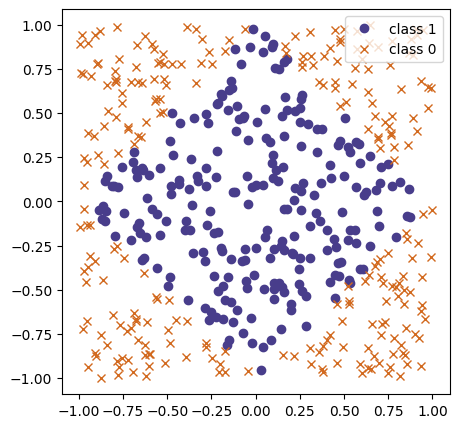

In [ ]:
## This code below generates two x values and a y value according to different patterns
## It also creates a "bias" term (a vector of 1s)
## The goal is then to learn the mapping from x to y using a neural network via back-propagation

num_obs = 500
x_mat_1 = np.random.uniform(-1,1,size = (num_obs,2))
x_mat_bias = np.ones((num_obs,1))
x_mat_full = np.concatenate( (x_mat_1,x_mat_bias), axis=1)

# PICK ONE PATTERN BELOW and comment out the rest.

# # Circle pattern
# y = (np.sqrt(x_mat_full[:,0]**2 + x_mat_full[:,1]**2)<.75).astype(int)

# # Diamond Pattern
y = ((np.abs(x_mat_full[:,0]) + np.abs(x_mat_full[:,1]))<1).astype(int)

# # Centered square
# y = ((np.maximum(np.abs(x_mat_full[:,0]), np.abs(x_mat_full[:,1])))<.5).astype(int)

# # Thick Right Angle pattern
# y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>-.5)).astype(int)

# # Thin right angle pattern
# y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>0)).astype(int)


print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')
# ax.grid(True)
ax.legend(loc='best')
ax.axis('equal');

<hr>

**Observation**:
- Here, we can see that we defined the dataset that we will use to train the model. The "num_obs" is the number of observations that we use as an input of our dataset, the "x_mat_1" is the dataset which is created from randomly choosing from -1 to 1 in a uniform distribution and it has a shape of (500,2), the "x_mat_bias" represents the bias of our nodes, which is created by using np.ones that creates an array filled with ones. The x_mat_full is the concatenated x_mat_1 and x_mat_bias, which creates the dataset with a shape of (500,3), which means that there are 500 rows and 3 columns (2 columns for features and 1 column for bias). Lastly, our "y" is created by using a threshold that results to 1 if the sum is less than 1, otherwise it is 0. Our "y" is the class in our dataset, and it represents the target variable.

<hr>

In [ ]:
def sigmoid(x):
    """
    Sigmoid function
    """
    return 1.0 / (1.0 + np.exp(-x))


def loss_fn(y_true, y_pred, eps=1e-16):
    """
    Loss function we would like to optimize (minimize)
    We are using Logarithmic Loss
    http://scikit-learn.org/stable/modules/model_evaluation.html#log-loss
    """
    y_pred = np.maximum(y_pred,eps)
    y_pred = np.minimum(y_pred,(1-eps))
    return -(np.sum(y_true * np.log(y_pred)) + np.sum((1-y_true)*np.log(1-y_pred)))/len(y_true)


def forward_pass(W1, W2):
    """
    Does a forward computation of the neural network
    Takes the input `x_mat` (global variable) and produces the output `y_pred`
    Also produces the gradient of the log loss function
    """
    global x_mat
    global y
    global num_
    # First, compute the new predictions `y_pred`
    z_2 = np.dot(x_mat, W_1)
    a_2 = sigmoid(z_2)
    z_3 = np.dot(a_2, W_2)
    y_pred = sigmoid(z_3).reshape((len(x_mat),))
    # Now compute the gradient
    J_z_3_grad = -y + y_pred
    J_W_2_grad = np.dot(J_z_3_grad, a_2)
    a_2_z_2_grad = sigmoid(z_2)*(1-sigmoid(z_2))
    J_W_1_grad = (np.dot((J_z_3_grad).reshape(-1,1), W_2.reshape(-1,1).T)*a_2_z_2_grad).T.dot(x_mat).T
    gradient = (J_W_1_grad, J_W_2_grad)

    # return
    return y_pred, gradient


def plot_loss_accuracy(loss_vals, accuracies):
    fig = plt.figure(figsize=(16, 8))
    fig.suptitle('Log Loss and Accuracy over iterations')

    ax = fig.add_subplot(1, 2, 1)
    ax.plot(loss_vals)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Log Loss')

    ax = fig.add_subplot(1, 2, 2)
    ax.plot(accuracies)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Accuracy');

Complete the pseudocode below

Iteration 0, Accuracy = 0.516, Loss = 0.8348624512123557
Iteration 200, Accuracy = 0.884, Loss = 0.3070750917265277
Iteration 400, Accuracy = 0.962, Loss = 0.1712695341652139
Iteration 600, Accuracy = 0.982, Loss = 0.13561484261758971
Iteration 800, Accuracy = 0.982, Loss = 0.12185315621486367


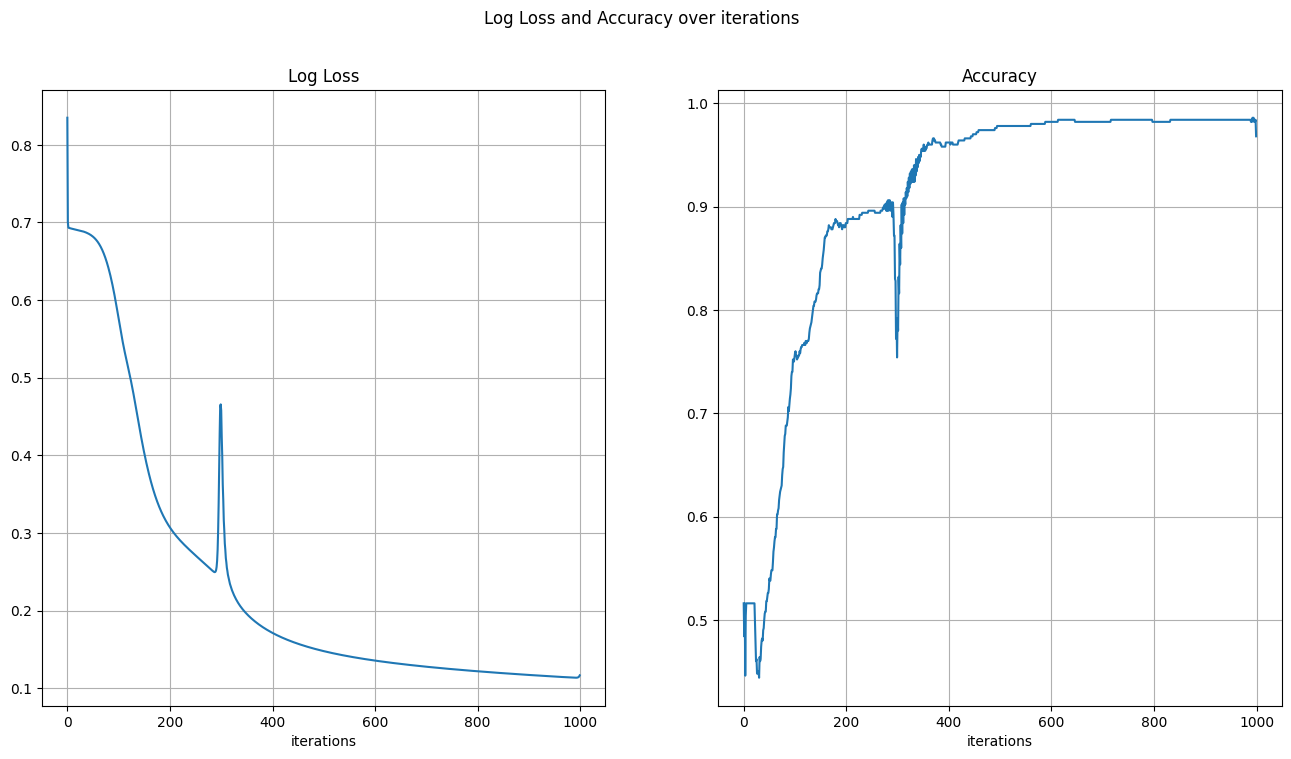

In [ ]:
#### Initialize the network parameters

np.random.seed(1241)

W_1 = np.random.uniform(-1, 1, size = (3,5))
W_2 = np.random.uniform(-1, 1, size = (5))
num_iter = 1000
learning_rate = 0.01
x_mat = x_mat_full
loss_vals, accuracies = [], []

for i in range(num_iter):
    ### Do a forward computation, and get the gradient
    y_pred, gradient = forward_pass(W_1, W_2)
    ## Update the weight matrices
    W_1 -= learning_rate * gradient[0]
    W_2 -= learning_rate * gradient[1]
    ### Compute the loss and accuracy
    loss1 = loss_fn(y, y_pred)
    loss_vals.append(loss1)
    acc1 = np.mean((y_pred>=.5) == y)
    accuracies.append(acc1)
    ## Print the loss and accuracy for every 200th iteration
    if((i%200)==0):
      print(f"Iteration {i}, Accuracy = {acc1}, Loss = {loss1}")

plot_loss_accuracy(loss_vals, accuracies)

<hr>

**Observation**:

- We can observe above in the code that the range of the weights is from -1 to 1 and the shape of W_1 is (3,5) and W_2 is (5). The (3,5) in W_1 represents 3 input neurons and 5 hidden layer neurons, the (5) in W_2 represents the previous hidden layer neurons and then for the output layer, it is not specified. Our "num_iter" is the variable that defines the number of iterations to train the model, or the "epoch" in this case. Our learning rate is the rate that defines the step size in each iteration. Loss vals and accuracies are empty arrays which will be used to store the loss and accuracy of our model. In the for loop, we pass the number of iterations which defines the number of times that our for loop will run. Then in the first line inside the for loop, we start by getting the y_pred and gradient from doing a forward pass, with W_1 and W_2. Then we adjust the weights by subtracting the learning rate multiplied to the gradient that we got from the feed forward function. Then we compute the loss function and pass it to the array, and then we also compute the accuracy by using a threshold where we classify values that are higher than 0.5 as 1 otherwise 0. Lastly, we print the result every 200 iterations and also the graph.

- In the graph, we can observe that the loss goes down as the iterations increase and there are some spikes in the middle but overall the loss became really low as the iterations reach 1000. Regarding the accuracy, we can observe that as the iterations increase, the accuracy also increases. The accuracy reached its peak around 600th iteration and it stagnated until the 1000th iteraton.

- Our final accuracy is 0.982 with a loss of 0.12 which is pretty good since this is a syntethic dataset.

<hr>

Plot the predicted answers, with mistakes in yellow

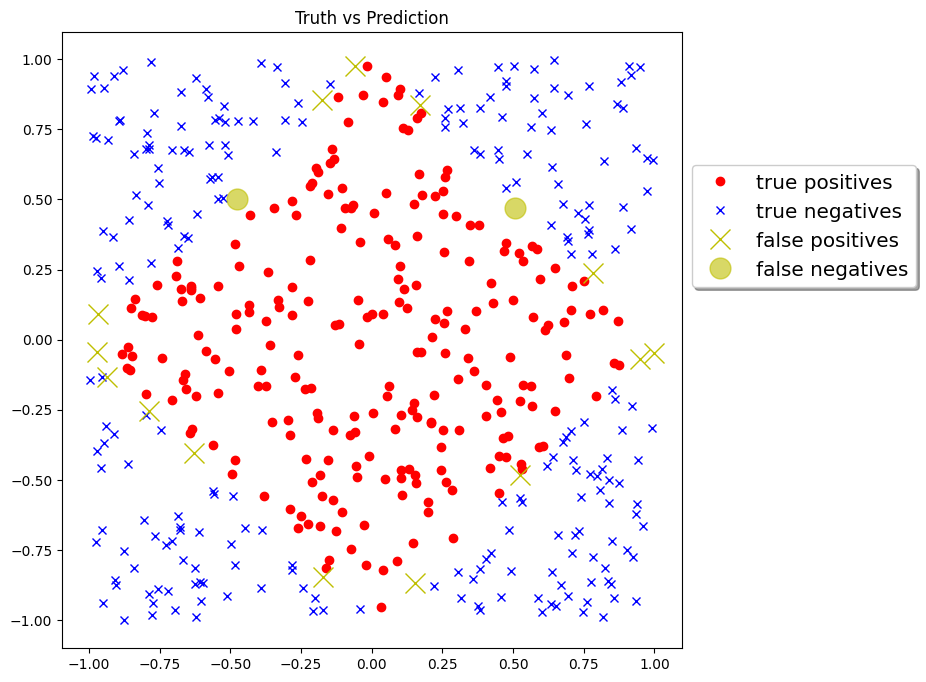

In [ ]:
pred1 = (y_pred>=.5)
pred0 = (y_pred<.5)

fig, ax = plt.subplots(figsize=(8, 8))
# true predictions
ax.plot(x_mat[pred1 & (y==1),0],x_mat[pred1 & (y==1),1], 'ro', label='true positives')
ax.plot(x_mat[pred0 & (y==0),0],x_mat[pred0 & (y==0),1], 'bx', label='true negatives')
# false predictions
ax.plot(x_mat[pred1 & (y==0),0],x_mat[pred1 & (y==0),1], 'yx', label='false positives', markersize=15)
ax.plot(x_mat[pred0 & (y==1),0],x_mat[pred0 & (y==1),1], 'yo', label='false negatives', markersize=15, alpha=.6)
ax.set(title='Truth vs Prediction')
ax.legend(bbox_to_anchor=(1, 0.8), fancybox=True, shadow=True, fontsize='x-large');

<hr>

**Observation**:

- Here we can observe the true positives, true negatives, false positives and false negatives that our model made. The true positives are the correct prediction of the model of the value class 1 or for this case the pred1 (values which are greater than or equal to 1). The true negatives are the correct prediction of the model of the value class 0 or the pred 0 (values less than 0.5). The false positives are the wrong prediction of the model of the class 1 (e.g. model classifies class 1 as class 0) The false negatives are the wrong prediction of the model of the class 0 (e.g. model classifies class 0 as class 1).

- As we observe the graph above, we can see that our model made a lot of prediction which are false positives than the false negatives.

- We can also observe that our model achieved the diamond shape which we set earlier for our target variable y.

- Overall, we can see that our model predicted the classes quite accurately, we can see in the graph that majority of the points plotted are red and blue, which represents the correct predictions of our model.

<hr>

#### Supplementary Activity

1. Use a different weights , input and activation function
2. Apply feedforward and backpropagation
3. Plot the loss and accuracy for every 300th iteration


shape of x_mat_full is (500, 3)
shape of y is (500,)


<ipython-input-31-d69e06a66f5b>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
<ipython-input-31-d69e06a66f5b>:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')


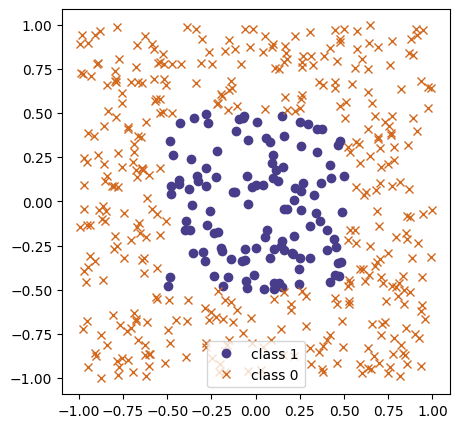

In [ ]:
num_obs = 500
x_mat_1 = np.random.uniform(-1,1,size = (num_obs,2))
x_mat_bias = np.ones((num_obs,1))
x_mat_full = np.concatenate( (x_mat_1,x_mat_bias), axis=1)

# # Centered square
y = ((np.maximum(np.abs(x_mat_full[:,0]), np.abs(x_mat_full[:,1])))<.5).astype(int)

print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')
# ax.grid(True)
ax.legend(loc='best')
ax.axis('equal');

<hr>

**Observation**:

- As you can observe the code above, I used the same exact configuration for the num_obs, x_mat_1, x_mat_bias, and x_mat_full. We still have 500 rows and 3 columns in our x_mat_full, the 2 columns represents the features while the last column represents the bias. I used the centered square as the shape of our target variable y, which creates classes based on the absolute value of a certain feature (if the feature's absolute value is less than 0.5, it is assigned class 1 label). We can see in the graph above that the class 1 forms a centered square shape that is surrounded by class 0. This is the shape that we want our model to create through prediction.

<hr>

In [ ]:
def hyptanh(x):
  cosh = (np.exp(x)+np.exp(-x))/2
  sinh = (np.exp(x)-np.exp(-x))/2
  return sinh/cosh

def forward_pass_hyptanh(W1, W2):
    """
    Does a forward computation of the neural network
    Takes the input `x_mat` (global variable) and produces the output `y_pred`
    Also produces the gradient of the log loss function
    """
    global x_mat
    global y
    global num_
    # First, compute the new predictions `y_pred`
    z_2 = np.dot(x_mat, W_1)
    a_2 = hyptanh(z_2)
    z_3 = np.dot(a_2, W_2)
    y_pred = hyptanh(z_3).reshape((len(x_mat),))
    # Now compute the gradient
    J_z_3_grad = -y + y_pred
    J_W_2_grad = np.dot(J_z_3_grad, a_2)
    a_2_z_2_grad = hyptanh(z_2)*(1-hyptanh(z_2))
    J_W_1_grad = (np.dot((J_z_3_grad).reshape(-1,1), W_2.reshape(-1,1).T)*a_2_z_2_grad).T.dot(x_mat).T
    gradient = (J_W_1_grad, J_W_2_grad)

    # return
    return y_pred, gradient




Iteration 0, Accuracy = 0.496, Loss = 0.8142897490346449
Iteration 300, Accuracy = 0.762, Loss = 0.44879849258111837
Iteration 600, Accuracy = 0.778, Loss = 0.3772716804601937
Iteration 900, Accuracy = 0.894, Loss = 0.31978523491115696
Iteration 1200, Accuracy = 0.93, Loss = 0.2939862640849326
Iteration 1500, Accuracy = 0.942, Loss = 0.2812498855011267
Iteration 1800, Accuracy = 0.942, Loss = 0.2724196647711634
Iteration 2100, Accuracy = 0.948, Loss = 0.2648123676294399
Iteration 2400, Accuracy = 0.95, Loss = 0.2579609773588552
Iteration 2700, Accuracy = 0.954, Loss = 0.2519909603247163


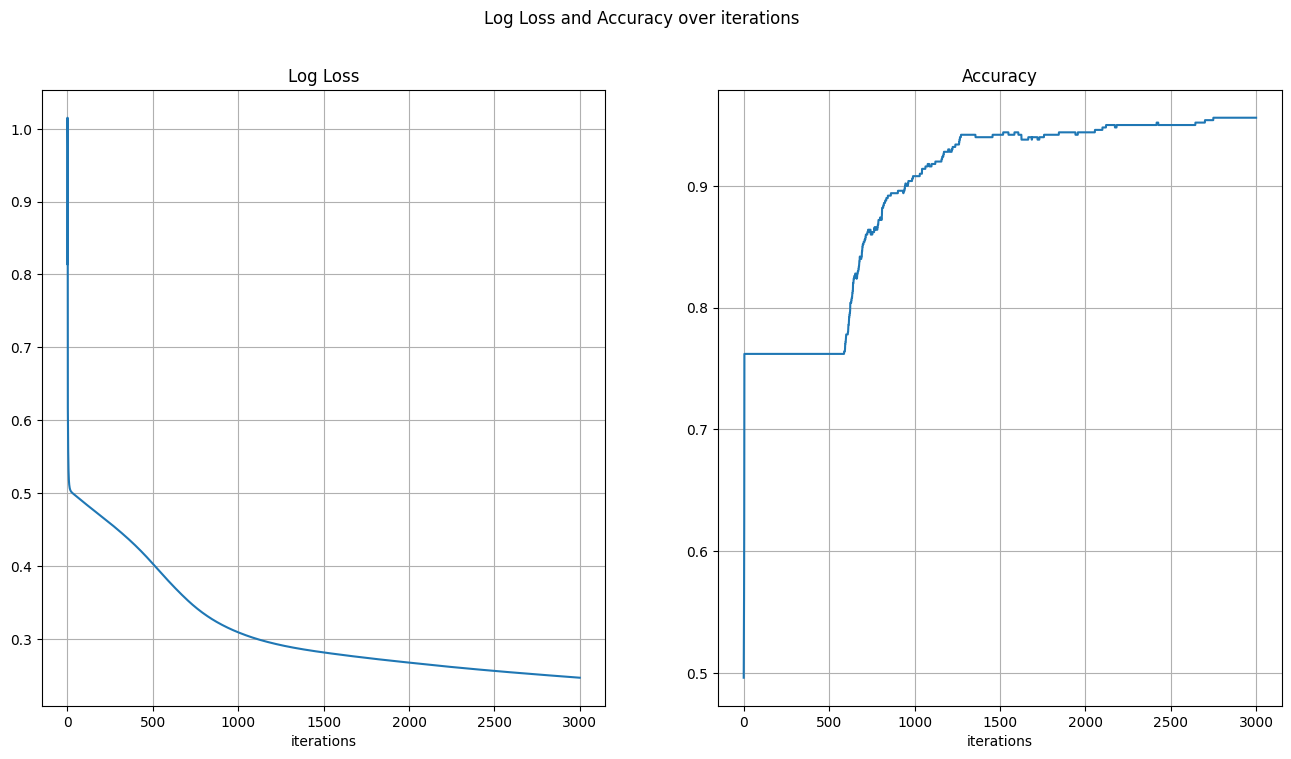

In [ ]:
#### Initialize the network parameters

np.random.seed(1017)

W_1 = np.random.uniform(-0.9, 1, size = (3,6))
W_2 = np.random.uniform(-0.9, 1, size = (6))
num_iter = 3000
learning_rate = 0.001
x_mat = x_mat_full


loss_vals, accuracies = [], []
for i in range(num_iter):
    ### Do a forward computation, and get the gradient
    y_pred, gradient = forward_pass_hyptanh(W_1, W_2)
    ## Update the weight matrices
    W_1 -= learning_rate * gradient[0]
    W_2 -= learning_rate * gradient[1]
    ### Compute the loss and accuracy
    loss1 = loss_fn(y, y_pred)
    loss_vals.append(loss1)
    acc1 = np.mean((y_pred>=.5) == y)
    accuracies.append(acc1)
    ## Print the loss and accuracy for every 300th iteration
    if((i%300)==0):
      print(f"Iteration {i}, Accuracy = {acc1}, Loss = {loss1}")

plot_loss_accuracy(loss_vals, accuracies)

<hr>

**Observation**:
- Here, we can observe that I changed the value of the np.random.seed, this is to generate new set of random numbers. I also changed the values for W_1 and W_2 by changing the range where the random numbers are generated (-0.9 to 1). I also changed the shape of W_1 and W_2, from (3,5) to (3,6) and from (5) to (6), this means that we still have 3 input nodes but the number of the hidden layer nodes is now 6. The number of iteration is also increased from 1000 to 3000 iterations. The learning rate has been changed also, from 0.01 to 0.001. For the forward pass of our model, I used the hyptanh as the activation function instead of the sigmoid activation function. The adjustment of the weight still stays the same as well as the computation for the loss and the accuracy of the model. Another adjustment is with the display of the iterations, from every 200th iteration to now every 300th iteration.

- We can observe from the graph above that it is much smoother than the graph from the model that we created earlier. There are no visible spikes in the graph of the log loss, and the trend also stays the same, as the number of iterations increases the log loss decreases.

- For the graph of the accuracy, we can also see that there are no large spikes as compared to the graph of the model that we created earlier. An interesting thing to observe is that the stagnation of the accuracy from 0 to 500th iteration. My guess is that the learning rate is too small. After it passed the 500th iteration, the accuracy increases until it reaches its peak of 0.954. The trend is also the same, as the number of iteration increases, the accuracy increases.

- The final accuracy of our model is 0.954 and its loss is 0.251. The model earlier is much better than this model since its accuracy is 0.982 and its loss is 0.12. But overall, this model also performed very well with this dataset.

<hr>

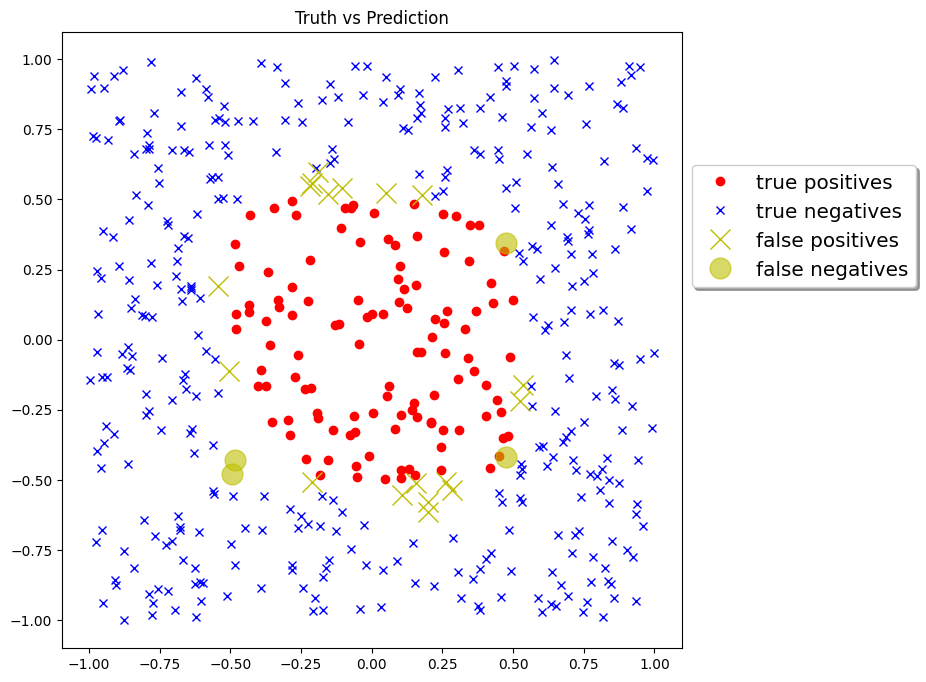

In [ ]:
pred1 = (y_pred>=.5)
pred0 = (y_pred<.5)

fig, ax = plt.subplots(figsize=(8, 8))
# true predictions
ax.plot(x_mat[pred1 & (y==1),0],x_mat[pred1 & (y==1),1], 'ro', label='true positives')
ax.plot(x_mat[pred0 & (y==0),0],x_mat[pred0 & (y==0),1], 'bx', label='true negatives')
# false predictions
ax.plot(x_mat[pred1 & (y==0),0],x_mat[pred1 & (y==0),1], 'yx', label='false positives', markersize=15)
ax.plot(x_mat[pred0 & (y==1),0],x_mat[pred0 & (y==1),1], 'yo', label='false negatives', markersize=15, alpha=.6)
ax.set(title='Truth vs Prediction')
ax.legend(bbox_to_anchor=(1, 0.8), fancybox=True, shadow=True, fontsize='x-large');

<hr>

**Observation**:
- Here, we can observe that our model predicted more false positives than false negatives, which is the same with our previous model. We can also observe that our model achieved the centered square which we set for our target variable y.

- Overall, the model has performed very well since we can see that the majority of the plotted points are red and blue, which represents the true positives and true negatives, that also means that our model has predicted the classes very accurately.


<hr>

#Summary / Conclusion

<hr>

### Summary:
- In this activity, we first explored the activation functions and the representation of the neurons as boolean gates. I also did some exercises regarding the boolean gates, where I assigned different weights to get the desired output. The next thing I did are the exercises, in these exercises, I am tasked to run a feed forward network line by line. I started with the dot product of the input layer and the weights, and then applied sigmoid activation function to that layer. I did the same for the next layer but with the previous results as the value for the nodes. Then lastly, I applied softmax activation function to the output node so that we can get the result in probabilities.

- For the procedure exercise, I created a syntethic dataset consisting of 500 rows and 3 columns, and then the chosen shape for the target variable y is diamond. Then I created a model with the weights ranging from -1 to 1 and the number of hidden layer nodes is 5. The number of iterations for this model is 1000 and the learning rate is 0.01. The activation function used in this mode is sigmoid function. I created a for loop which loops until the number of the iterations is reached, then I get the y_pred and gradient from the feed forward function. The gradient is used to adjust the weights by multiplying it to the learning rate and subtracting it to the original weight. After this, I computed the loss using the loss function and the accuracy using thresholding (y_pred >=0.5), basically the values greater than 0.5 will be class 1 otherwise 0. I then plotted the log loss and accuracy graphs. This model has an accuracy of 0.982 and a loss of 0.12 which is very good results for a syntethic model.

- For the supplementary, the same steps of the procedure exercise has been executed but there are differences in the value of the iterations, weights, hidden layer nodes, the activation function, and learning rate. The value of my iteration for the supplementary model is 3000, the value of weights range from -0.9 to 1, the hidden layer nodes is 6, the activation function is hyptanh, and the learning rate is 0.001. Overall, this model performed worse compared to the procedure exercise model. The accuracy of this model is 0.954 and the loss is 0.251.

<hr>




### Conclusion:
-
In conclusion, this activity provided a hands-on exploration of neural network concepts, starting with understanding activation functions and representing neurons as boolean gates. Through exercises involving the manipulation of weights to achieve desired outputs, I gained insight into the fundamental operations of neural networks. Subsequently, I applied these concepts to run a feedforward network, constructing a model to classify a synthetic dataset. The model achieved high accuracy (0.982) and low loss (0.12) using sigmoid activation functions and appropriate parameters. In a supplementary exercise, adjustments were made to parameters such as the number of iterations, weights, and activation function. While the model still performed well with an accuracy of 0.954, the loss was higher at 0.251, indicating a less optimal configuration. Overall, this activity provided valuable experience in building and evaluating neural network models, highlighting the importance of model tuning in achieving optimal performance. I will certainly recommend this activity to future data science students because it can build their foundation in data science and especially neural networks.

<hr>